# Analsis to find Profitable Apps for the App Store and Google Play Markets

**By Mehdi Ghane**

**May 10, 2020. Reading time:20 minutes**

## Table of Content
1. [Introduction](#Introduction)
2. [Getting and Cleaning Data](#Getting-and-Cleaning-Data)
3. [Descriptive Analysis](#Descriptive-Analysis)
4. [Conclusions](#Conclusions)

## Introduction
The objective of this project is to explore and find mobile app profiles that are profitable for the App Store and Google Play markets. Project is raised by a company that builds Android and iOS mobile apps, and our job is to help developer team to make a data-driven decisions with respect to the kind of apps they should build.

Since the majority of built apps are free to download and install, the main source of revenue is from in-app ads. Therefore, the revenue is mostly influenced by the number of users who use the apps. Our goal for this project is to analyze data to understand what kinds of apps are likely to attract more users, so those selected apps will be considered as the main focus of development team. 

## Getting and Cleaning Data
As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.
Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. These are two data sets that seem suitable for our goals and they can be found on Kaggle:
* [A data set](https://www.kaggle.com/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. We can download the data set directly from this [link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).
* [A data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. You can download the data set directly from this [link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
# download data and assign into dataframe
dfapl = pd.read_csv('AppleStore.csv')
dfgoo = pd.read_csv('googleplaystore.csv')

In [6]:
dfapp.info(), dfgoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 899.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-n

(None, None)

In [8]:
dfapl.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1


In [10]:
dfgoo.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [11]:
dfapl.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [12]:
dfgoo.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [3]:
# Remove inaccurate rows with rating>5
dfgoo.drop(dfgoo[dfgoo['Rating']>5].index, inplace=True)

In [4]:
# we also remove duplicates
dfgoo.duplicated().value_counts()

False    10357
True       483
dtype: int64

In [5]:
dfapl.drop_duplicates(inplace=True)
dfgoo.drop_duplicates(inplace=True)

In [69]:
dfgoo.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

In [6]:
dfgoo.drop('Reviews', axis=1).duplicated().value_counts()

False    9782
True      575
dtype: int64

There are still duplicate values.Thoes are the same apps with different numbers for Review column. We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is to remove the duplicate rows randomly, but we could probably find a better way. From those duplicates, We are going to keep only the records with highest review and we remove the rest. Fortunately, there is not such issue with the Apple dataset.

In [7]:
dfapl.drop('rating_count_tot', axis=1).duplicated().value_counts()

False    7197
dtype: int64

In [8]:
## Continue Removing duplicates
selected_rows = []
for app in dfgoo['App'].unique():
    rowmax= dfgoo[dfgoo['App']==app]['Reviews'].map(pd.to_numeric).idxmax()
    selected_rows.append(rowmax)

In [9]:
# It looks okay now since we have selected rows equal to unique Apps
len(selected_rows)

9659

In [10]:
# Now lets remove duplicates and retain the record of maximum review for each unique app
dfgoo = dfgoo.loc[selected_rows]

In [11]:
dfgoo.duplicated().sum()

0

Now the duplicates are removed, but there are couple of non-English apps which are not of our interest. The company we work for, has a focus to creates apps for English-speaking users. Therefore, to have a valid analysis we need to remove all non-English apps. To achieve this goal, we will use the ord() built-in function which gives the corresponding number of each character, knowing that the numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange) system.

In [12]:
def langrecog(x):
    count = 0
    x = x.replace(' ','')
    for i in x:
      if ord(i)>127:
        count+=1
    if count>3:
        return 'NonEnglish'
    else: return 'English'

In [13]:
dfgoo = dfgoo[dfgoo['App'].apply(langrecog)=='English']
dfapl = dfapl[dfapl['track_name'].apply(langrecog)=='English']

In [14]:
dfgoo.shape , dfapl.shape

((9614, 13), (6183, 16))

**Last step is to filter data to capture only free apps**

In [15]:
def findfree(x):
    if str(x) != '0':
        return 'NotFree'
    else : return 'Free'

In [16]:
dfgoo = dfgoo[dfgoo['Price'].apply(findfree)=='Free']

In [17]:
def findfree(x):
    if x != 0:
        return 'NotFree'
    else : return 'Free'

In [18]:
dfapl = dfapl[dfapl['price'].apply(findfree)=='Free']

In [19]:
dfgoo.shape , dfapl.shape

((8864, 13), (3222, 16))

**We ended up with 8864 Android Apps and 3222 iOS Apps by passing our datasets to following cleaning steps:**
* Remove inaccurate data
* Remove duplicate app entries
* Remove non-English apps
* Filter for the free apps

**Now, it is the time to start our explanatory analysis**

## Descriptive Analysis

Our aim is to find the kinds of apps which appeal to more users because the company's revenue is highly influenced by the number of people using their apps. Usually, an Agile software development comprises of three steps in order ot minimize the risk and overhead.
1. Build a plilimanary version of app and add it to the Google Play.
2. If the app has got a good response from users, then develop it further
3. If the app turn to be profitable within a 6 months period of time, then build an iOS version and add it to the App Store.

Knowing that, our ultimate goal is to recognize the app which is highly demanded on both Google Play and App Store. To fullfill that purpose, we need to build the frequency table for both markets. 

Text(0.5, 0, 'Genre')

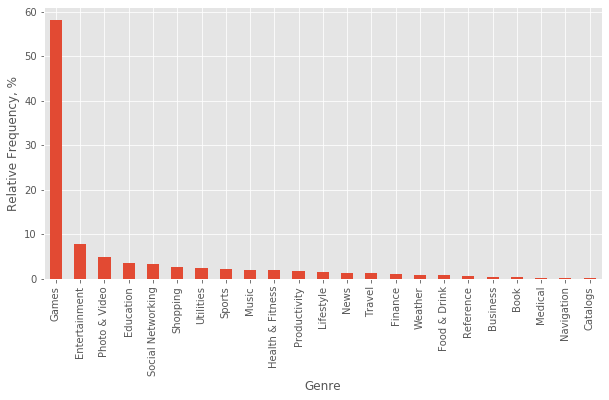

In [24]:
# Frequency plot for Apple Store Apps
plt.figure(figsize=(10,5))
dfapl['prime_genre'].value_counts(normalize=True).mul(100).round(2).plot.bar()
plt.ylabel('Relative Frequency, %')
plt.xlabel('Genre')

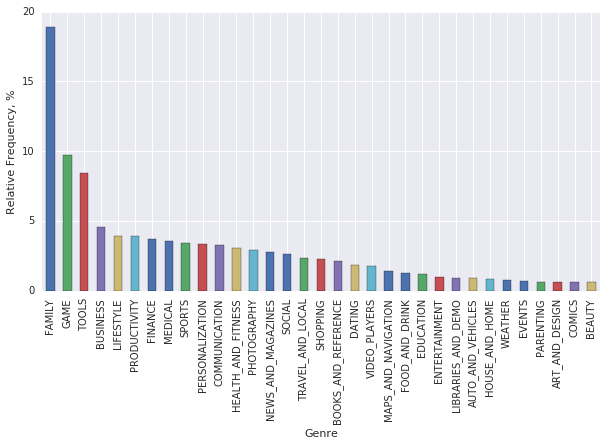

In [238]:
# Frequency plot for Google Play Apps based on Category
plt.figure(figsize=(10,5))
dfgoo['Category'].value_counts(normalize=True).mul(100).round(2).plot.bar()
plt.ylabel('Relative Frequency, %')
plt.xlabel('Genre')

In [21]:
# Frequency plot for Google Play Apps based of Genre
plt.figure(figsize=(10,5))
dfgoo['Genres'].value_counts(normalize=True).mul(100).round(2).reset_index().head(15)

,index,Genres
0,Tools,8.45
1,Entertainment,6.07
2,Education,5.35
3,Business,4.59
4,Productivity,3.89
5,Lifestyle,3.89
6,Finance,3.70
7,Medical,3.53
8,Sports,3.46
9,Personalization,3.32


<Figure size 720x360 with 0 Axes>

It seems Category column is more general than Genre in Google Play dataset, and it can be a good match with prime_genre in Apple Store dataset. Among the top genres on both markets is "Game". We need to know more about what "Family" genre is in the Google Play. By taking a look at Google Play website, we understand that Family genre is mostly games for kids. So, we can conclude the absolute runner-up genre for both markets is "Game". 

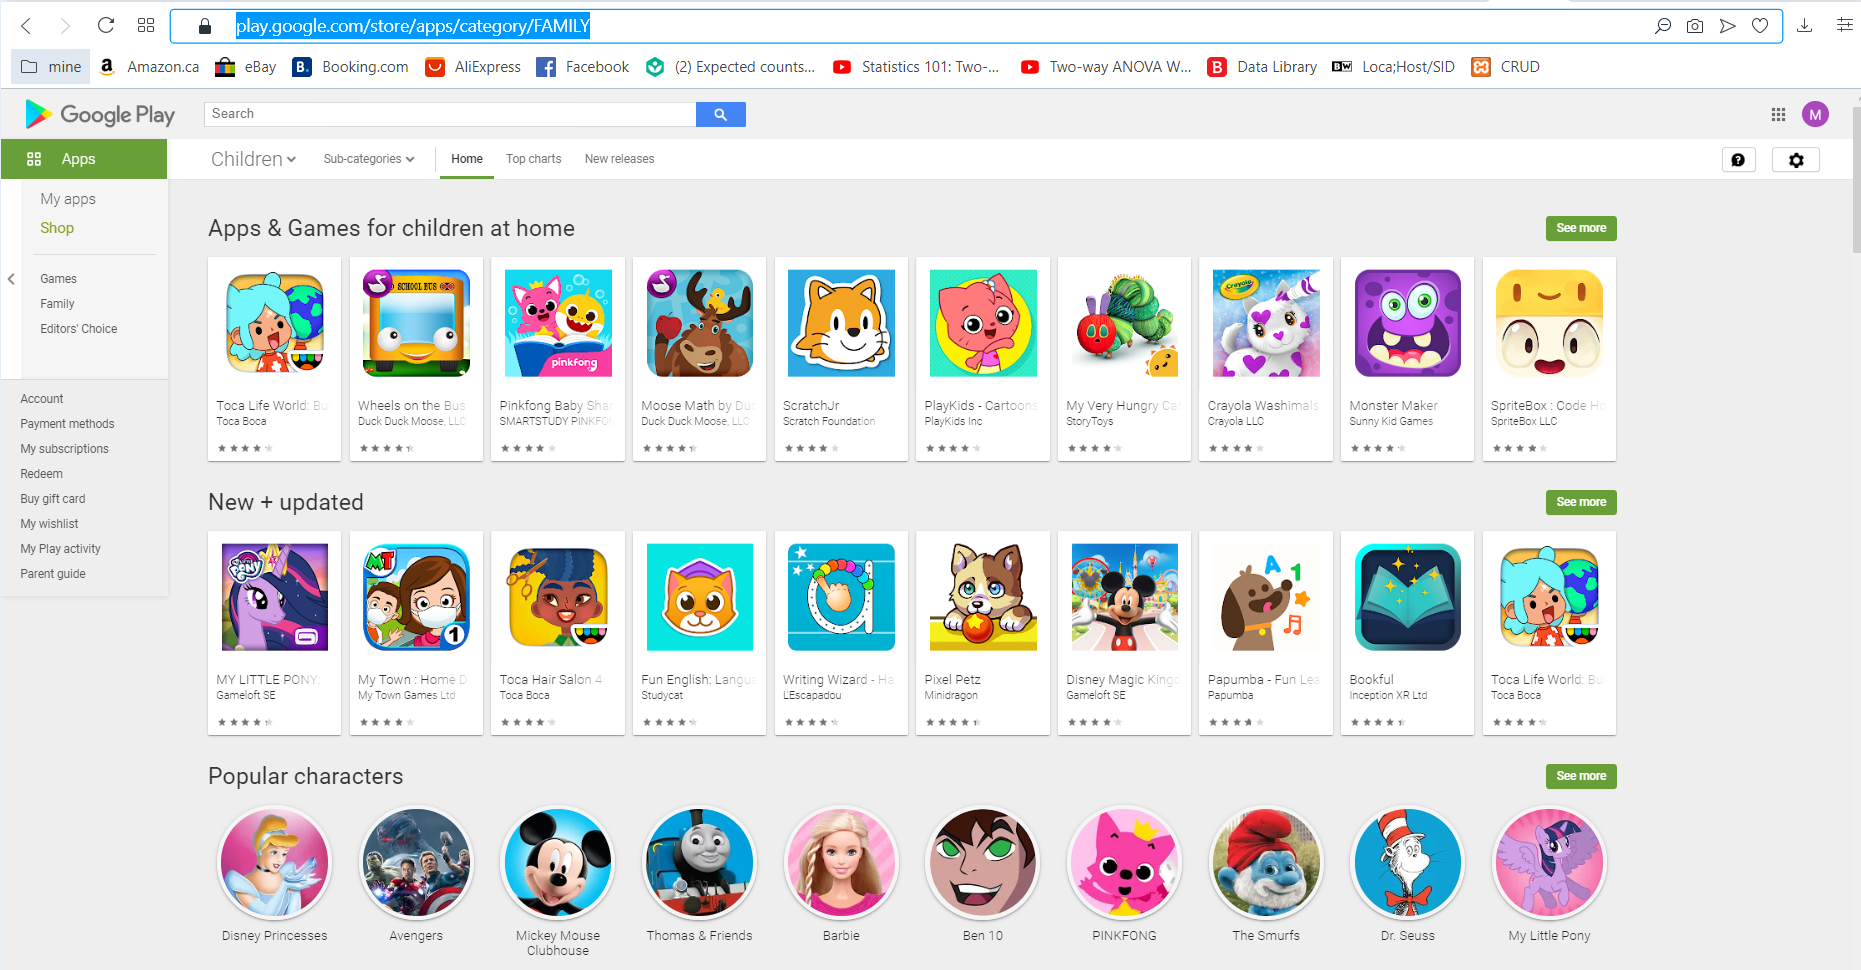

One more observation is that there is much more of practical apps such as apps for Business, Lifestyle, Education and ..etc on Google Play than Apple Store. Almost 70% of apps on Apple Store is designed for gaming and entertainment. So far, we understood that the dominant category of apps on Apple Store is for gaming and fun, but apps are more evenly distributed on Google Play where a good balance of fun and practical apps could be found. But the question still remains whether those apps with most frequency are also the most popular ones with more users. One way to estimate the number of users is to find the popularity which may resonates with the counting number of installations. Another way might be to see the rating of apps determined by users.

In [22]:
# Need to convert types of columns in Google data to an appropriate type for further analysis
dfgoo['Reviews'] = dfgoo['Reviews'].astype(float)

(0, 100000)

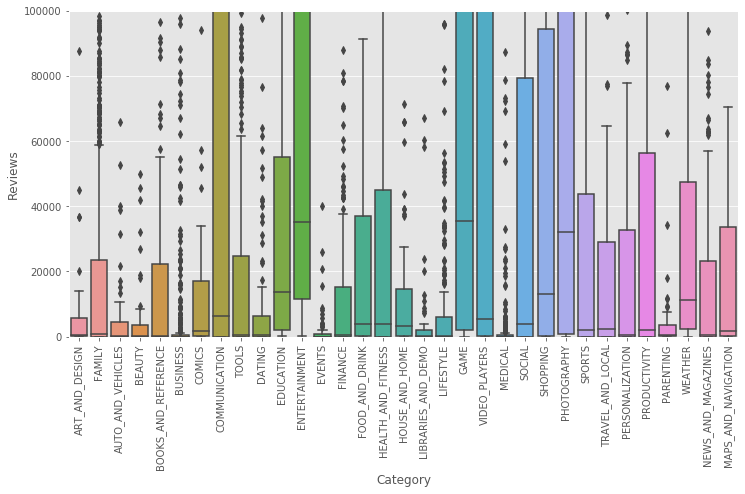

In [23]:
# Review variation per each Category
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.boxplot(data=dfgoo, y='Reviews', x='Category')
plt.xticks(rotation=90)
plt.ylim(0,100000)

(2.5, 5.5)

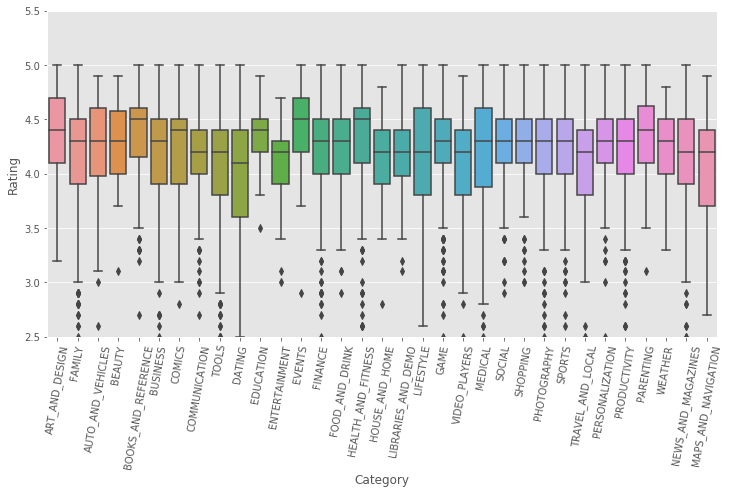

In [110]:
# Rating variation per each category
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.boxplot(data=dfgoo, y='Rating', x='Category')
plt.xticks(rotation=80)
plt.ylim(2.5,5.5)

(0, 100000)

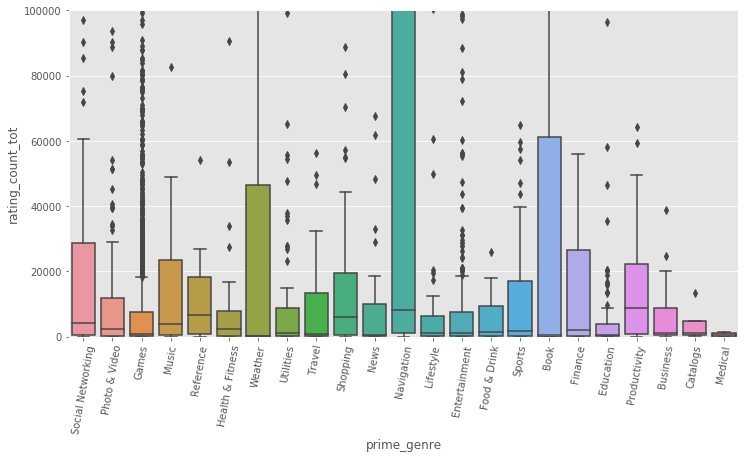

In [205]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dfapl, y='rating_count_tot', x='prime_genre')
plt.xticks(rotation=80)
plt.ylim(0,100000)

Google Play dataset: Rather than Gaming, there is a relatively high median of Reviews in categories like photography and shopping. When looking at the same plot for Rating, there is a fairly high median and higher range of rating in categories such as Event, Health, and Parenting in comparison with Game and Family (literally, Games for kids).
Apple Store dataset: There is a good median and high rating values in categories such as Book, Navigation, Productivity, Social Networking, Shopping, and music. 

In [25]:
# convert Install from object to numeric
dfgoo['Installs'] = dfgoo['Installs'].apply(lambda x: pd.to_numeric(x.replace(',','').rsplit('+')[0]))

In [26]:
# Create a pivot table from category and installs. Let's see if we can obtain a new insight from install
pivot1 = dfgoo.groupby(['Category','Installs']).sum().reset_index().sort_values(['Category','Installs'], ascending=False)
pivot1.head(15)

,Category,Installs,Rating,Reviews
498,WEATHER,50000000,17.7,7406242.0
497,WEATHER,10000000,43.4,3593483.0
496,WEATHER,5000000,28.7,538562.0
495,WEATHER,1000000,88.9,498847.0
494,WEATHER,500000,26.5,82892.0
493,WEATHER,100000,49.1,34350.0
492,WEATHER,50000,4.5,3252.0
491,WEATHER,10000,11.9,1123.0
490,WEATHER,5000,4.2,29.0
489,WEATHER,1000,0.0,25.0


(0, 400)

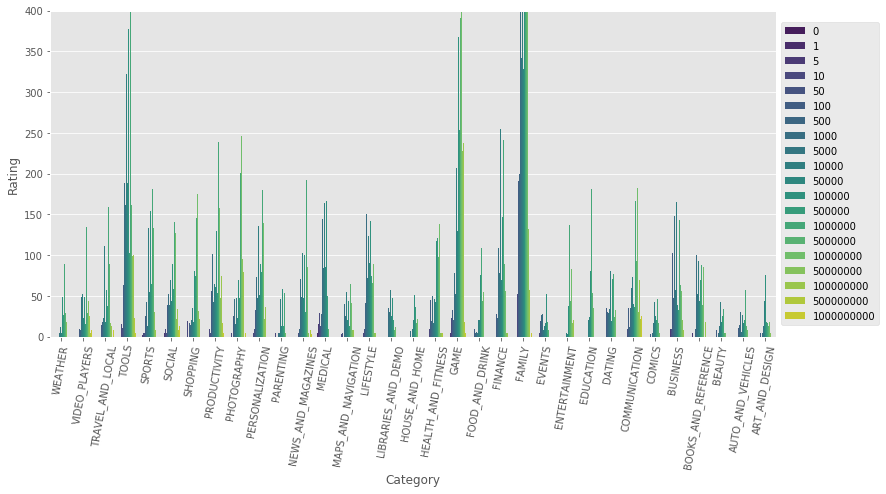

In [238]:
plt.figure(figsize=(13,6))
sns.barplot(data=pivot1, y='Rating', hue='Installs', x='Category', palette='viridis').legend(loc='center left',bbox_to_anchor=(1, 0.5)) 
plt.xticks(rotation=80)
plt.ylim(0,400)

Further refinement through pivot tabling shows there is a high number of installations with a fairly high rating observed in categories like Communication, Tools, and Photography. For better visualization and simple desicion, we merge all Installation for each category. Since Game is dominant with most frequency, an aggregate function of "mean" or "median" in each category might be a better statistical measure compared to "count" in order to evaluate the influence and popularity of apps.

In [27]:
pivot2 = dfgoo.groupby('Category').mean().reset_index()
pivot2.head(10)

,Category,Rating,Reviews,Installs
0,ART_AND_DESIGN,4.338182,24699.421053,1.986335e+06
1,AUTO_AND_VEHICLES,4.184722,14140.280488,6.473178e+05
2,BEAUTY,4.278571,7476.226415,5.131519e+05
3,BOOKS_AND_REFERENCE,4.347799,87995.068421,8.767812e+06
4,BUSINESS,4.103953,24239.727273,1.712290e+06
5,COMICS,4.177358,42585.618182,8.176573e+05
6,COMMUNICATION,4.126923,995608.463415,3.845612e+07
7,DATING,3.982443,21953.272727,8.540288e+05
8,EDUCATION,4.340196,56293.097087,1.833495e+06
9,ENTERTAINMENT,4.118824,301752.247059,1.164071e+07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

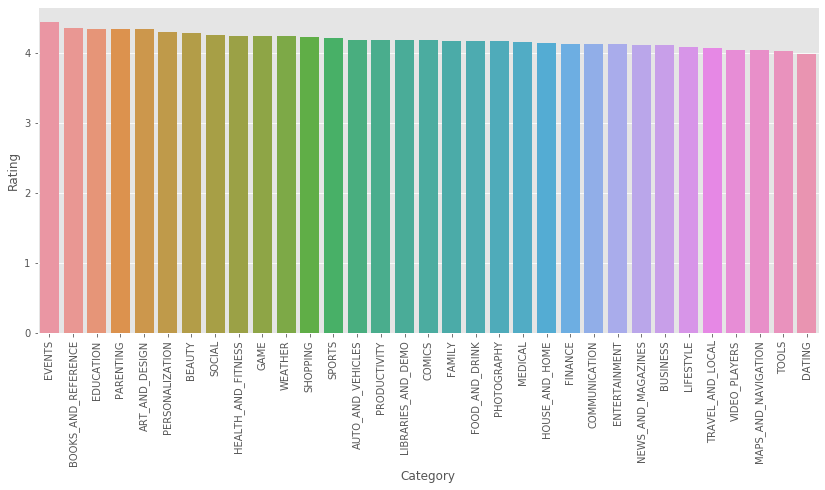

In [223]:
plt.figure(figsize=(14,6))
sns.barplot(data=pivot2.sort_values('Rating', ascending=False), x='Category',y='Rating')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

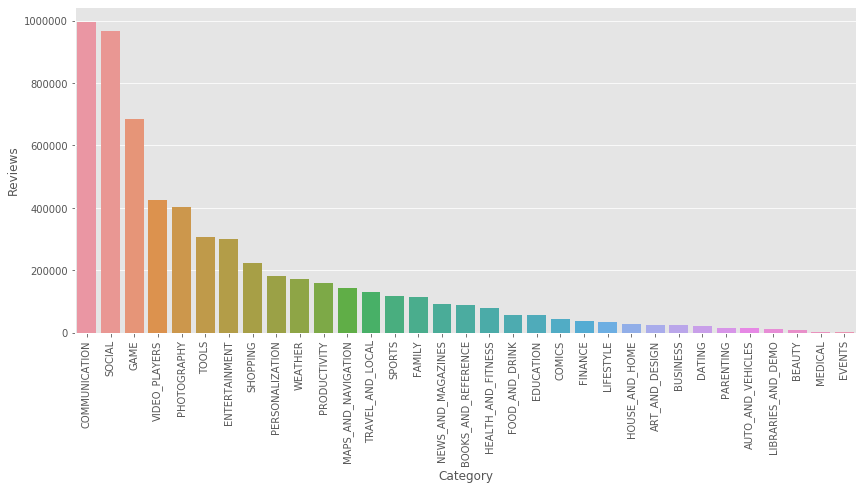

In [224]:
plt.figure(figsize=(14,6))
sns.barplot(data=pivot2.sort_values('Reviews', ascending=False), x='Category',y='Reviews')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

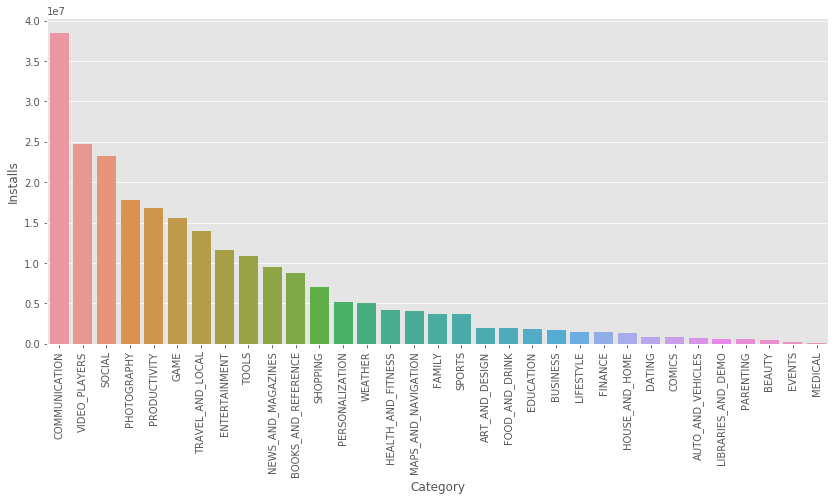

In [225]:
plt.figure(figsize=(14,6))
sns.barplot(data=pivot2.sort_values('Installs', ascending=False), x='Category',y='Installs')
plt.xticks(rotation=90)

Using average for aggregation, Game is no longer the top category in Google Play. We can see that app categories such as Communication, Social, Books and Education acheived the top ranks almost in all of the last three plots above. We examine the same thing for our other dataset; Apple Store. 

In [28]:
pivot3 = dfapl.groupby('prime_genre').mean()['rating_count_tot'].reset_index().sort_values('rating_count_tot', ascending=False)
pivot3.head(5)

,prime_genre,rating_count_tot
12,Navigation,86090.333333
16,Reference,74942.111111
18,Social Networking,71548.349057
11,Music,57326.530303
22,Weather,52279.892857


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

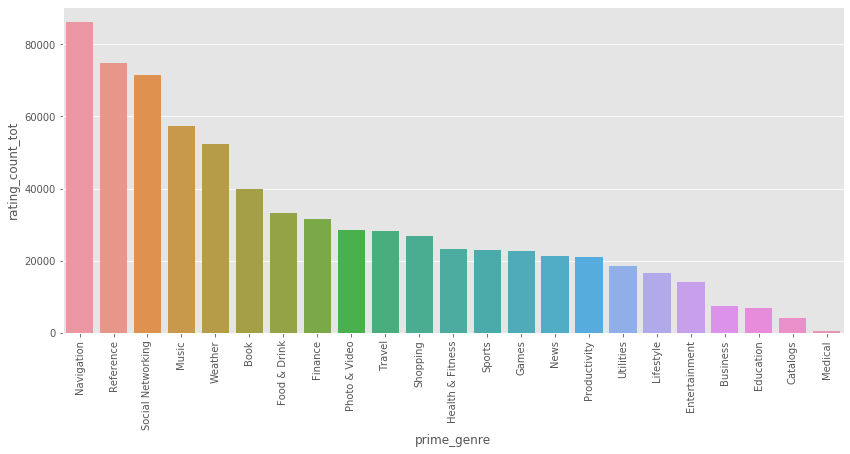

In [232]:
plt.figure(figsize=(14,6))
sns.barplot(data=pivot3, x='prime_genre',y='rating_count_tot')
plt.xticks(rotation=90)

Our analysis of Apple Store dataset also reveals there are categories such as Navigation, Reference and Book, Social Networking and Music with better rate compared to Game.
It looks some of genre with good potential in both Google and Apple markets are Social, Communication, References and Books. We will investigate those genre furhter more.

In [29]:
communication = dfgoo[dfgoo['Category']=='COMMUNICATION'].sort_values(['Installs','Reviews'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

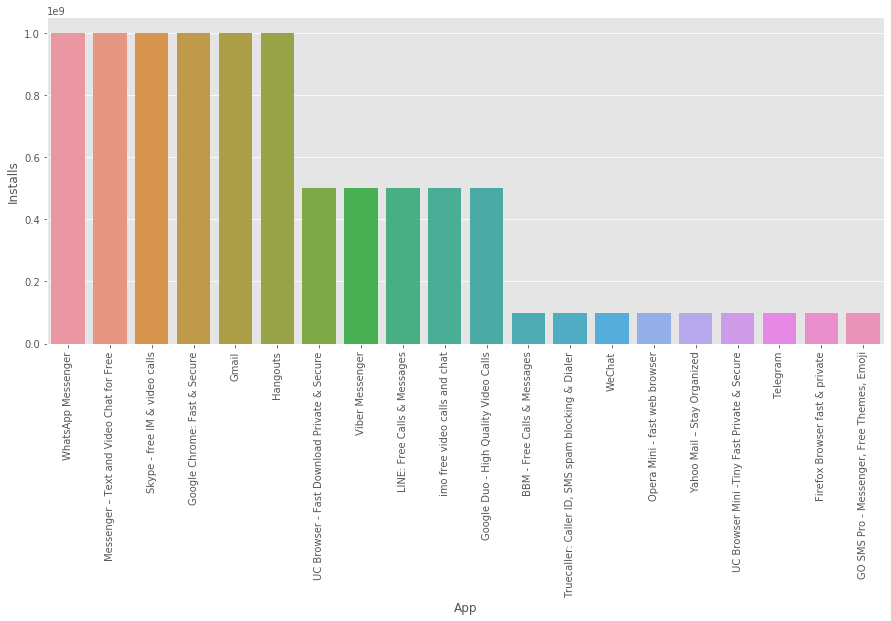

In [262]:
plt.figure(figsize=(15,6))
sns.barplot(data=communication.head(20), x='App', y='Installs')
plt.xticks(rotation=90)

Communication genre is controlled by popular and famous apps such as WhatsApp, Messnger, Skype, Hangout and ..etc. Literally there would not be a good chance to compete with those apps so there is not a good margin of profit in communication genre and it is not a field recommended for investment. Let's investigate Social genre in-depth.  

In [30]:
social_google = dfgoo[dfgoo['Category']=='SOCIAL'].sort_values(['Installs','Reviews'], ascending=False)

In [31]:
social_apple = dfapl[dfapl['prime_genre']=='Social Networking'].sort_values('rating_count_tot', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

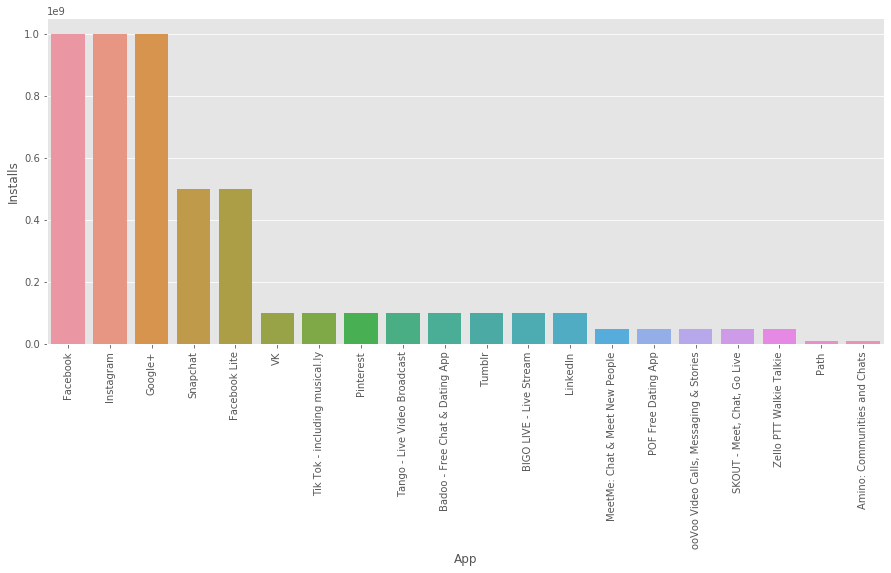

In [270]:
plt.figure(figsize=(15,6))
sns.barplot(data=social_google.head(20), x='App', y='Installs')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

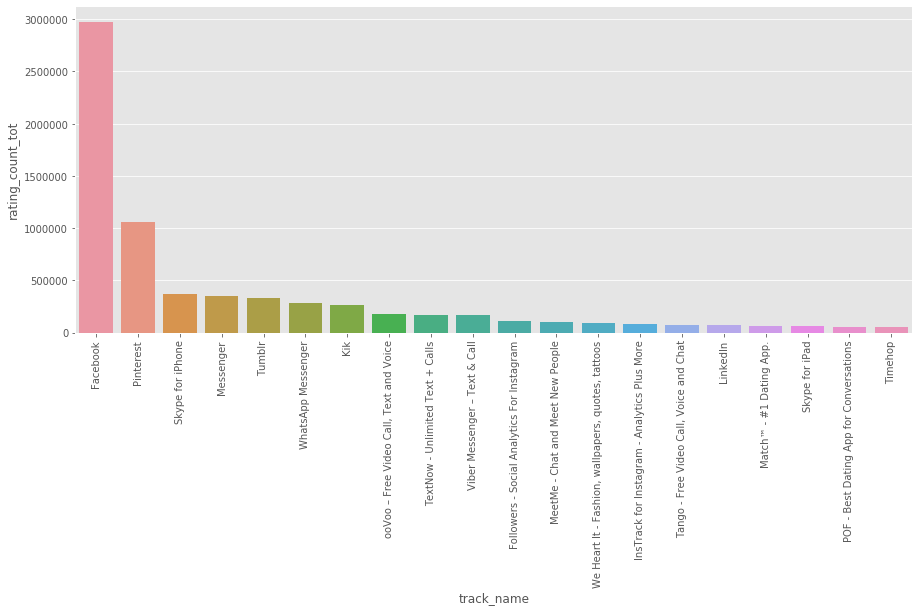

In [272]:
plt.figure(figsize=(15,6))
sns.barplot(data=social_apple.head(20), x='track_name', y='rating_count_tot')
plt.xticks(rotation=90)

The same insight can be achieved from above two charts. Majority of ratings belong to the first 4 or 5 top well-known apps with many users. It makes it impossible to find a choice for a successful investment in the Social Networking genre as well. We will explore the potential in 'Reference and Book' genre.

In [32]:
book_google = dfgoo[dfgoo['Category']=='BOOKS_AND_REFERENCE'].sort_values(['Installs','Reviews'], ascending=False)

In [33]:
book_apple = dfapl[(dfapl['prime_genre']=='Book') | (dfapl['prime_genre']=='Reference')].sort_values('rating_count_tot', ascending=False)

In [34]:
book_google[['App','Installs','Reviews','Rating']].head(20)

,App,Installs,Reviews,Rating
152,Google Play Books,1000000000,1433233.0,3.9
4715,Wattpad 📖 Free Books,100000000,2915189.0,4.6
3941,Bible,100000000,2440695.0,4.7
4083,Amazon Kindle,100000000,814151.0,4.2
5651,Audiobooks from Audible,100000000,568922.0,4.5
9625,JW Library,10000000,922752.0,4.9
6290,Dictionary.com: Find Definitions for English W...,10000000,899010.0,4.6
142,Wikipedia,10000000,577550.0,4.4
5345,Quran for Android,10000000,497826.0,4.7
9621,Dictionary - Merriam-Webster,10000000,454412.0,4.5


In [35]:
book_apple[['track_name','rating_count_tot']].head(20)

,track_name,rating_count_tot
6,Bible,985920
77,"Kindle – Read eBooks, Magazines & Textbooks",252076
90,Dictionary.com Dictionary & Thesaurus,200047
208,"Audible – audio books, original series & podcasts",105274
244,Color Therapy Adult Coloring Book for Adults,84062
285,OverDrive – Library eBooks and Audiobooks,65450
335,Dictionary.com Dictionary & Thesaurus for iPad,54175
364,HOOKED - Chat Stories,47829
551,Google Translate,26786
715,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",18418


**Seems there is a good demand for apps around holly books, dictionaries, and magazines. Let's check how many of those apps related to those topics currently exist on both market.**

In [36]:
book_google['App'].apply(lambda x: any(ele in x.lower() for ele in 
        ['quran','bible','dictionary','magazines'])).value_counts()

False    153
True      37
Name: App, dtype: int64

In [37]:
book_apple['track_name'].apply(lambda x: any(ele in x.lower() for ele in 
        ['quran','bible','dictionary','magazines'])).value_counts()

False    25
True      7
Name: track_name, dtype: int64

We notice there are few apps built around the book with those selected topics. It suggests that building an app around a book of those titles can be profitable. We may extend our insight and conclude in general that taking a popular book and turning it into an app could be profitable for both the Google Play and the App Store markets.

## Conclusions

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets. Game genre seems popular in both Google Play and Apple Store, however, it constitutes a very big chunk of designed apps and it seems both markets are already super saturated with this genre of apps. We looked for other genres which are potentially profitable on both markets. When sorting app categories based on average of installations, rankings or reviews we did find out that those genres like Communication, Social Networking and Books and Reference could be a place for investment. However, well-known apps such as Facebook, WhatsApp and ..etc occupied the market of communication and social networking. Therefore, Book and Reference genre turns to be the place for potential growth and achieve profits. Exploring the Book genre in more details suggests that creating an app for books in the context of religion, popular magazines and dictionaries for most spoken languages could be profitable for both Google Play and Apple Store.